Nomes: Paulo Henrique Silva Dias RA:156648

MAGNO LUIZ GONCALVES MELO : 133688


#Inicialização do Projeto e descrição dos dados
Atribuindo libs para análise

In [ ]:
#Montagem drive
from google.colab import drive
drive.mount('/content/drive')

#Inicialização de bibliotecas para analise
import numpy as np

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import style
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt

Mounted at /content/drive


Localização da base de dados

fonte:
https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

Sobre a base de dados:

A base de dados consiste em um csv de aproximadamente 400 rows e leva em consideração as seguintes classes/características:
Gênero, idade, profissão, duração do sono, qualidade do sono, nível de atividade física, nível de stress, BMI Category/IMC(classificação: acima do peso, normal, obeso), pressão sanguínea, batimentos cardiacos, passos diários e por fim o apontamento se pessoa possui insônia(classificação: Apneia do sono, insônia, sem disturbio de sono).

Principais recursos do conjunto de dados:
Métricas abrangentes do sono: explore a duração, a qualidade e os fatores que influenciam os padrões de sono.

Fatores de estilo de vida: analise os níveis de atividade física, níveis de estresse e categorias de IMC.

Saúde Cardiovascular: Examine as medições de pressão arterial e frequência cardíaca.

Análise de Distúrbios do Sono: Identifique a ocorrência de distúrbios do sono, como Insônia e Apnéia do Sono.

Colunas do conjunto de dados:
ID da pessoa: um identificador para cada indivíduo.

Gênero: O gênero da pessoa (Masculino/Feminino).

Idade: A idade da pessoa em anos.

Ocupação: A ocupação ou profissão da pessoa.

Duração do sono (horas): O número de horas que a pessoa dorme por dia.

Qualidade do Sono (escala: 1-10): Uma classificação subjetiva da qualidade do sono, variando de 1 a 10.

Nível de atividade física (minutos/dia): O número de minutos que a pessoa pratica atividade física diariamente.

Nível de Estresse (escala: 1-10): Uma classificação subjetiva do nível de estresse vivenciado pela pessoa, variando de 1 a 10.

Categoria de IMC: A categoria de IMC da pessoa (por exemplo, Abaixo do Peso, Normal, Sobrepeso).

Pressão Arterial (sistólica/diastólica): A medição da pressão arterial da pessoa, indicada como pressão sistólica sobre pressão diastólica.

Frequência cardíaca (bpm): A frequência cardíaca em repouso da pessoa em batimentos por minuto.

Passos Diários: O número de passos que a pessoa dá por dia.

Distúrbio do Sono: A presença ou ausência de um distúrbio do sono na pessoa (Nenhum, Insônia, Apnéia do Sono).


Detalhes sobre a coluna Distúrbios do Sono:

Nenhum: O indivíduo não apresenta nenhum distúrbio específico do sono.

Insônia: O indivíduo tem dificuldade em adormecer ou permanecer dormindo, levando a um sono inadequado ou de má qualidade.

Apnéia do Sono: O indivíduo sofre pausas na respiração durante o sono, resultando em padrões de sono interrompidos e riscos potenciais à saúde.


Original description:

Dataset Overview:
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.



In [ ]:
#leitura dos dados
data = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')

#descrição dos dados
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Data info: colunas, null values, type

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
#linhas e colunas
data.shape


(374, 13)

In [ ]:
# formato dos dados (object,int,float,etc)
data.dtypes

,0
Person ID,int64
Gender,object
Age,int64
Occupation,object
Sleep Duration,float64
Quality of Sleep,int64
Physical Activity Level,int64
Stress Level,int64
BMI Category,object
Blood Pressure,object


In [ ]:
data.columns.values

array(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'], dtype=object)

#Visualização dos dados

In [ ]:
def plotly_boxplot(df , numeric_types , color  , row = None) :
    def gather( df, key, value, cols ):
        id_vars = [ col for col in df.columns if col not in cols ]
        id_values = cols
        var_name = key
        value_name = value
        return pd.melt( df, id_vars, id_values, var_name, value_name )
    numeric_gather = gather( df , 'key', 'value', numeric_types )
    fig = px.box(numeric_gather, x="key", y="value",
                 facet_col="key" ,color = color ,
                 facet_row=row )
    fig.update_yaxes(showticklabels=True , matches=None)
    fig.update_xaxes(showticklabels=True , matches=None)
    fig.show()

In [ ]:
import plotly.express as px

def plotly_countplot(df, category, title, xlabel, ylabel):
    # Get the qualitative color palette
    palette = px.colors.qualitative.Plotly

    # Generate a list of colors, one for each unique category
    unique_categories = df[category].unique()
    num_colors = len(unique_categories)
    colors = palette[:num_colors]

    fig = px.histogram(df, x=category, color=category,
                     color_discrete_map=dict(zip(unique_categories, colors)))
    fig.update_layout(title=title, xaxis_title=xlabel, yaxis_title=ylabel)
    fig.show()

In [ ]:
def plotly_scatter(df , numerical_column_one, numerical_column_two ,
                   color = None  , row = None , col =None) :
    fig = px.scatter(df,
                     x=numerical_column_one,
                     y=numerical_column_two,
                     facet_col=col,
                     color = color ,
                     facet_row=row , height = 600)
    fig.update_yaxes(showticklabels=True , matches=None ,)
    fig.update_xaxes(showticklabels=True , matches=None)
    fig.show()

Gráficos de barras sobre as propoções dos dados, ou seja quantidade de cada classificação dentro das colunas(Gender,occupation BMI category e Sleep disorder)

In [ ]:
plotly_countplot(data, "Gender", "Gender Distribution", "Gender", "Count")
plotly_countplot(data, "Occupation", "Occupation Distribution", "Occupation", "Count")
plotly_countplot(data, "BMI Category", "BMI Category Distribution", "BMI Category", "Count")
plotly_countplot(data, "Sleep Disorder", "Sleep Disorder Distribution", "Sleep Disorder", "Count")

Apontamentos sobre nível de estresse, duração do sono, qualidade do sono, IMC, passos por dia e nivel de atividade física por profissão.

In [ ]:
#Graficos de barras para comparação de atributos por ocupação
plotly_boxplot(data, ["Stress Level", "Sleep Duration", "Quality of Sleep"], "Occupation")
plotly_boxplot(data, ["Physical Activity Level", "BMI Category", "Daily Steps"], "Occupation")

Apontamentos sobre nível de estresse, duração do sono, qualidade do sono, IMC, passos por dia e nivel de atividade física por gênero.

In [ ]:
#Graficos de barras para comparação de atributos por genero
plotly_boxplot(data, ["Stress Level", "Sleep Duration", "Quality of Sleep"], "Gender")
plotly_boxplot(data, ["Physical Activity Level", "BMI Category", "Daily Steps"], "Gender")

apontamentos sobre nível de estresse, duração do sono e qualidade do sono por IMC

In [ ]:
plotly_boxplot(data, ["Stress Level", "Sleep Duration", "Quality of Sleep"], "BMI Category")

Apontamentos sobre nível de estresse e duração do sono por qualidade do sono.

In [ ]:
plotly_boxplot(data, ["Stress Level", "Sleep Duration"], "Quality of Sleep")

In [ ]:
plotly_scatter(data, "Age", "Sleep Duration",color="BMI Category")
plotly_scatter(data, "Quality of Sleep", "Sleep Duration",color="Physical Activity Level")
plotly_scatter(data, "Quality of Sleep", "Sleep Duration",color="Stress Level")

<ipython-input-17-063bf85b2a43>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




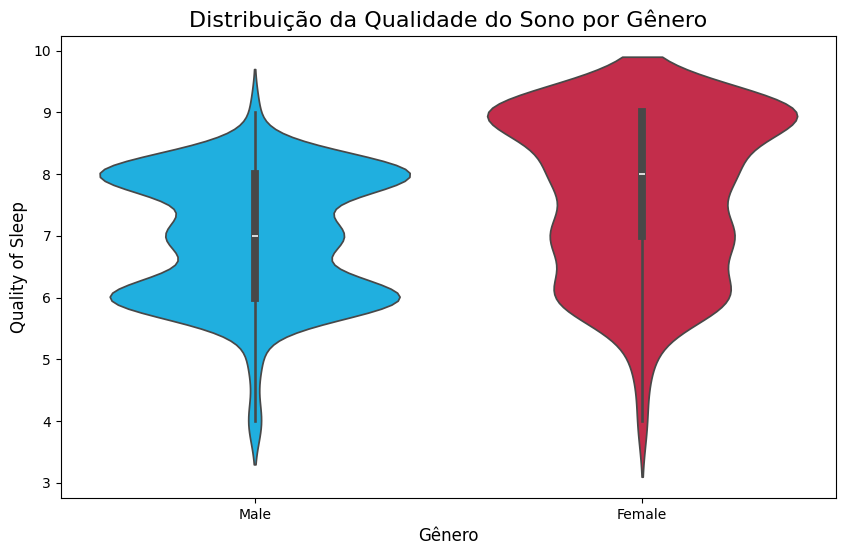

In [ ]:
color_palette = {'Male': 'deepskyblue', 'Female': 'crimson'}

plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Quality of Sleep', data=data,palette=color_palette)
plt.title('Distribuição da Qualidade do Sono por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Quality of Sleep', fontsize=12)
plt.show()

In [ ]:
fig = px.bar(data,
             x='Stress Level',
             y='Quality of Sleep',
             color='Stress Level',
             title='Relação entre o nível de estresse e a qualidade do sono',
             width=900, height=600,
             labels={
                 'Stress Level': 'Nível de Estresse',
                 'Quality of Sleep': 'Qualidade do Sono'
             }
            )
fig.show()

In [ ]:
fig = px.bar(data,
             x='Stress Level',
             y='Sleep Duration',
             color='Stress Level',
             title='Relação entre o nível de estresse e a duração do sono',
             width=900, height=600,
             labels={
                 'Stress Level': 'Nível de Estresse',
                 'Sleep Duration': ' Duração do sono'
             }
            )
fig.show()

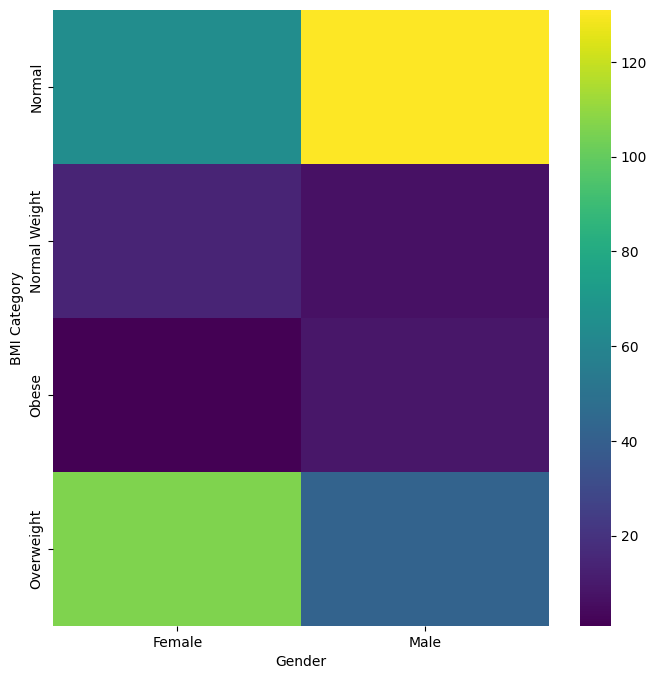

In [ ]:
# @title Gender vs BMI Category

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BMI Category'].value_counts()
    for x_label, grp in data.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('BMI Category')

#Pre-processamento dos dados

Nesse primeiro processamento os dados serão usados para uma avaliação de resultados, sem os dados tratados, mas em diferentes modelos.

In [ ]:
dataProcessada = data.copy()

In [ ]:
dataProcessada = pd.concat([dataProcessada, dataProcessada['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
dataProcessada = dataProcessada.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
dataProcessada['BloodPressure_Upper'] = dataProcessada['BloodPressure_Upper'].astype(int)
dataProcessada['BloodPressure_Lower'] = dataProcessada['BloodPressure_Lower'].astype(int)

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataProcessada['Gender'] = label_encoder.fit_transform(dataProcessada['Gender'])
dataProcessada['Occupation'] = label_encoder.fit_transform(dataProcessada['Occupation'])
dataProcessada['BMI Category'] = label_encoder.fit_transform(dataProcessada['BMI Category'])
dataProcessada['Sleep Disorder'] = label_encoder.fit_transform(dataProcessada['Sleep Disorder'])
dataProcessada.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,BloodPressure_Lower
0,1,1,27,9,6.1,6,42,6,3,77,4200,2,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,2,125,80
3,4,1,28,6,5.9,4,30,8,2,85,3000,1,140,90
4,5,1,28,6,5.9,4,30,8,2,85,3000,1,140,90


Avaliação de correlações e plot gráfico

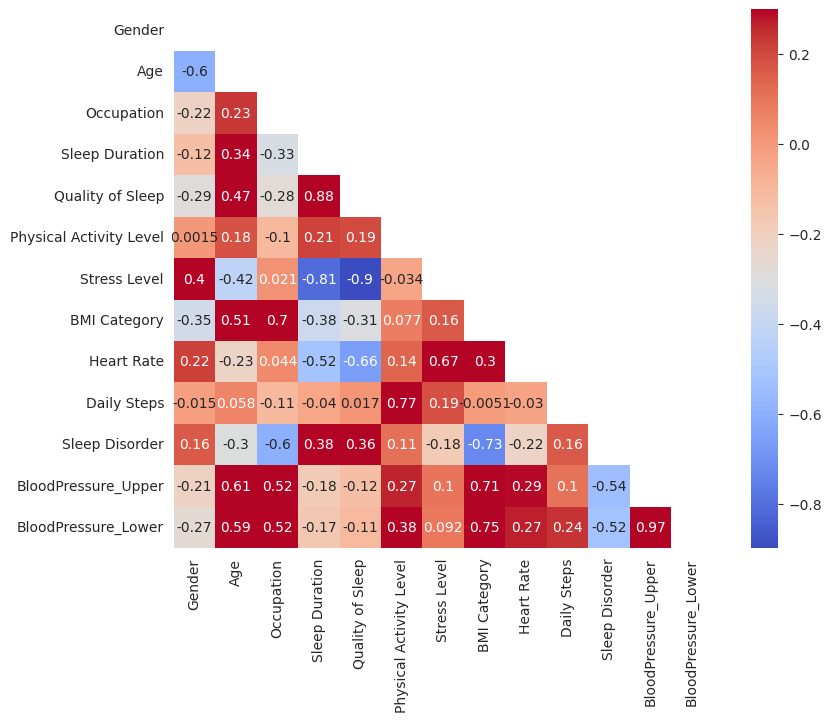

In [ ]:
def corr_vis(corr) :
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(10, 7))
        g = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='coolwarm')
        g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 10)

num_corr = dataProcessada.drop('Person ID', axis=1).corr()
corr_vis(dataProcessada.drop('Person ID', axis=1).corr())

#Extração de Padrões (treino dos modelos)

In [ ]:
#separacao da base em hold-out
from sklearn.model_selection import train_test_split

X = dataProcessada.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = dataProcessada['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#normalização

from sklearn.preprocessing import StandardScaler

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X_train)
X_test_scaled = scaler_d.transform(X_test)

In [ ]:
#Regressao Logistica
from sklearn.linear_model import LogisticRegression

# Create the models
regressaoLogistica = LogisticRegression()

# Fit the models
regressaoLogistica.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
xgb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [ ]:
#Rede Neural
from sklearn.neural_network import MLPClassifier # importação do modelo de rede neural MLPClassifier do scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error # importação das métricas de avaliação do modelo

n_epochs = 5000 #definição do numero de epocas
rede = MLPClassifier(hidden_layer_sizes=(11,), random_state=1, activation='relu', solver='adam', alpha=0.0001) #definição da rede neural

#treino da rede pelo numero de epocas definido e resultado de cada iteração
for epoch in range(n_epochs):
    rede.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    predito =  rede.predict(X_test_scaled)


    #validação do modelo
    print(f"Epoch {epoch + 1}/{n_epochs} - Score: {rede.score(X_test_scaled, y_test)}")


Epoch 1/5000 - Score: 0.10666666666666667
Epoch 2/5000 - Score: 0.10666666666666667
Epoch 3/5000 - Score: 0.10666666666666667
Epoch 4/5000 - Score: 0.10666666666666667
Epoch 5/5000 - Score: 0.13333333333333333
Epoch 6/5000 - Score: 0.13333333333333333
Epoch 7/5000 - Score: 0.10666666666666667
Epoch 8/5000 - Score: 0.10666666666666667
Epoch 9/5000 - Score: 0.10666666666666667
Epoch 10/5000 - Score: 0.10666666666666667
Epoch 11/5000 - Score: 0.10666666666666667
Epoch 12/5000 - Score: 0.13333333333333333
Epoch 13/5000 - Score: 0.13333333333333333
Epoch 14/5000 - Score: 0.13333333333333333
Epoch 15/5000 - Score: 0.13333333333333333
Epoch 16/5000 - Score: 0.14666666666666667
Epoch 17/5000 - Score: 0.14666666666666667
Epoch 18/5000 - Score: 0.16
Epoch 19/5000 - Score: 0.21333333333333335
Epoch 20/5000 - Score: 0.22666666666666666
Epoch 21/5000 - Score: 0.22666666666666666
Epoch 22/5000 - Score: 0.24
Epoch 23/5000 - Score: 0.28
Epoch 24/5000 - Score: 0.30666666666666664
Epoch 25/5000 - Score:

#Avaliação dos Modelos 1
Abaixo estão os resultados que os modelos obtiveram (f1-score), que se aproximam dos projetos que temos como comparação, vale ressaltar que o pre-processamento também foi identico ao projeto que estamos comparando, para se obter uma métrica que possa ser usada para compararmos com o nosso modelo desenvolvido.

In [ ]:
print("Regressao Logistica")
print(regressaoLogistica.score(X_test_scaled, y_test))
r1 = regressaoLogistica.score(X_test_scaled, y_test)
print("Random Forest")
print(randomForest.score(X_test_scaled, y_test))
r2 = randomForest.score(X_test_scaled, y_test)
print("Gradient Boosting")
print(xgb.score(X_test_scaled, y_test))
r3 = xgb.score(X_test_scaled, y_test)
print("Rede Neural")
print(rede.score(X_test_scaled, y_test))
r4 = rede.score(X_test_scaled, y_test)

Regressao Logistica
0.9066666666666666
Random Forest
0.9466666666666667
Gradient Boosting
0.9466666666666667
Rede Neural
0.9466666666666667


# Visualização dos resultados dos modelos usando outras métricas de precisão:
Metrics: precision, recall, f1-score, support

In [ ]:
from sklearn.metrics import accuracy_score
import plotly.express as px
colors = px.colors.sequential.Plasma_r

def plot_classification_report(report, title):
    lines = report.split('\n')[2:-5]
    classes = []
    precision = []
    recall = []
    f1_score = []
    support = []
    for line in lines:
        row_data = line.split()
        classes.append(row_data[0])
        precision.append(float(row_data[1]))
        recall.append(float(row_data[2]))
        f1_score.append(float(row_data[3]))
        support.append(int(row_data[4]))

In [ ]:
from sklearn.metrics import classification_report

regressorReport = classification_report(y_test, regressaoLogistica.predict(X_test_scaled))
randomForestReport = classification_report(y_test, randomForest.predict(X_test_scaled))
xgbReport = classification_report(y_test, xgb.predict(X_test_scaled))
redeReport = classification_report(y_test, predito)

print("Regressao Logistica")
print(regressorReport)
print("Random Forest")
print(randomForestReport)
print("Gradient Boosting")
print(xgbReport)
print("Rede Neural")
print(redeReport)

Regressao Logistica
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.83      0.86        18
           2       0.91      0.95      0.93        42

    accuracy                           0.91        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.91      0.91      0.91        75

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.89      0.94        18
           2       0.93      1.00      0.97        42

    accuracy                           0.95        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.95      0.95      0.95        75

Gradient Boosting
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.89      0.94        18
           2       0.93

#Matriz de confusão, abaixo temos a matriz de confusão dos modelos testados

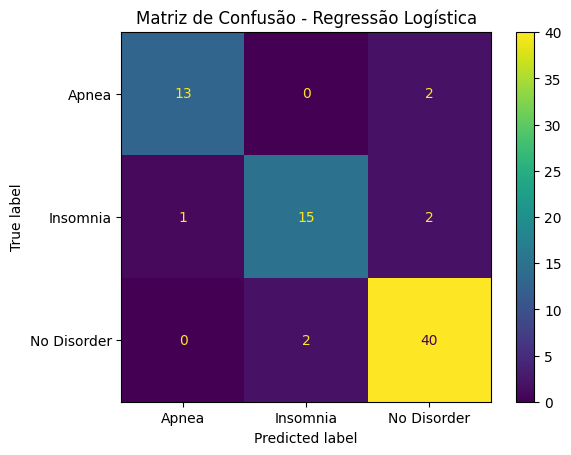

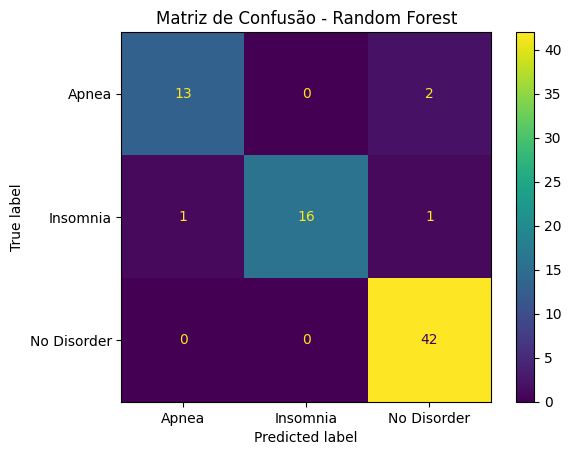

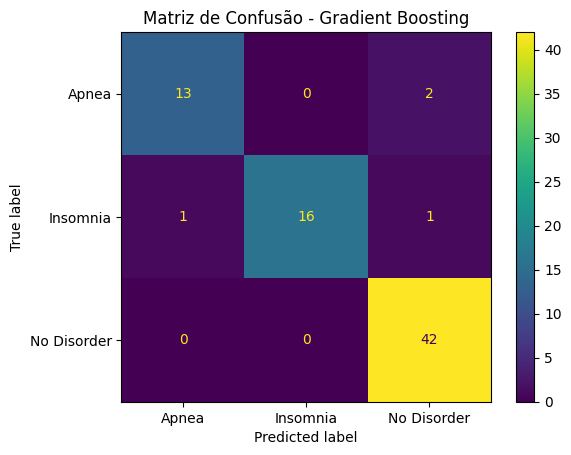

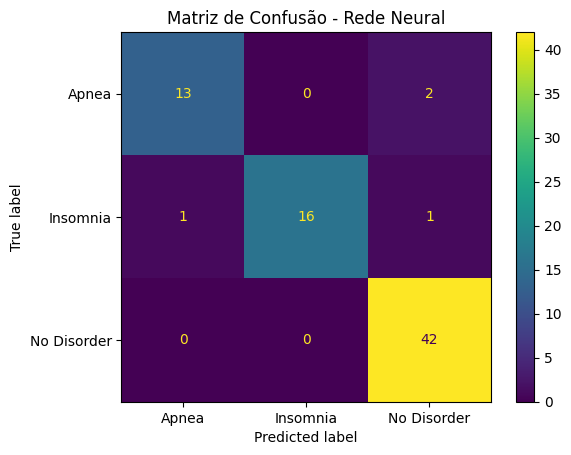

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

linearPredict = regressaoLogistica.predict(X_test_scaled)
randomForestPredict = randomForest.predict(X_test_scaled)
xgbPredict = xgb.predict(X_test_scaled)
redePredict = rede.predict(X_test_scaled)

cmlinear = confusion_matrix(y_test, linearPredict)
cmrandomForest = confusion_matrix(y_test, randomForestPredict)
cmxgb = confusion_matrix(y_test, xgbPredict)
cmrede = confusion_matrix(y_test, redePredict)

y_names = ['Apnea', 'Insomnia', 'No Disorder']

disp_linear = ConfusionMatrixDisplay(confusion_matrix=cmlinear, display_labels=y_names)
disp_randomForest = ConfusionMatrixDisplay(confusion_matrix=cmrandomForest, display_labels=y_names)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cmxgb, display_labels=y_names)
disp_rede = ConfusionMatrixDisplay(confusion_matrix=cmrede, display_labels=y_names)

disp_linear.plot()
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

disp_randomForest.plot()
plt.title("Matriz de Confusão - Random Forest")
plt.show()

disp_xgb.plot()
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

disp_rede.plot()
plt.title("Matriz de Confusão - Rede Neural")
plt.show()


#Pre-Processamento 2
A partir dessa parte do código passamos a desenvolver modelos que possam competir em performace com o projeto que estamos comparando.

In [ ]:
# Cópia dos dados em dataProcessada2
dataProcessada2 = data.copy()

Abaixo estão os tratamentos aplicados nos dados, a razão é manter a base normalizada
1. primeiro pressão sanguínea, de forma simples vamos tranformar a pressão sanguínea dividindo em pressão sistólica(BloodPressure_Upper) e pressão diastólica(BloodPressure_Lower), e converter para int.


In [ ]:
dataProcessada2 = pd.concat([dataProcessada2, dataProcessada2['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
dataProcessada2 = dataProcessada2.rename(columns={0: 'BloodPressure_Upper', 1: 'BloodPressure_Lower'})
dataProcessada2['BloodPressure_Upper'] = dataProcessada2['BloodPressure_Upper'].astype(int)
dataProcessada2['BloodPressure_Lower'] = dataProcessada2['BloodPressure_Lower'].astype(int)

Alguns campos da coluna BMI Category apresentam o classficação "peso normal"(Normal Weight), entretanto também temos a classificação "normal"(Normal), para manter o padrão vamos deixar o valor "peso normal" como "normal"

In [ ]:
dataProcessada2['BMI Category'] = dataProcessada2['BMI Category'].replace('Normal Weight', 'Normal')

Label Encoding: A função LabelEncoder converte categorias (valores textuais) em números inteiros. Por exemplo, se a coluna 'Sleep Disorder' tem valores como 'Insomnia', 'Sleep Apnea', 'Narcolepsy', etc., o LabelEncoder transformará esses valores em números como 0, 1, 2, etc.

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
dataProcessada2['Sleep Disorder'] = label_encoder.fit_transform(dataProcessada2['Sleep Disorder'])

Aplicando o OneHotEncoder para as colunas fields BMI category, occupation, gender.
Motivo:
Para resolver isso iremos utilizar o hot encoding (ou one-hot encoding), que é uma técnica comum para transformar atributos categóricos em uma representação numérica. Ele cria colunas binárias (0 ou 1/true or false) para cada categoria de um atributo. Dessa forma evitamos que uma errônea hierarquia seja interpretada pelo algoritmo.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns for one-hot encoding
categorical_cols = ['BMI Category', 'Occupation', 'Gender']

# Create OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the categorical columns
encoded_data = encoder.fit_transform(dataProcessada2[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded DataFrame with the original DataFrame (dropping the original categorical columns)
dataProcessada2 = pd.concat([dataProcessada2.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Now 'dataProcessada2' contains one-hot encoded columns for 'BMI Category', 'Occupation', and 'Gender'
dataProcessada2.head()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Upper,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Gender_Female,Gender_Male
0,1,27,6.1,6,42,6,77,4200,2,126,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2,28,6.2,6,60,8,75,10000,2,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,28,6.2,6,60,8,75,10000,2,125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,28,5.9,4,30,8,85,3000,1,140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,28,5.9,4,30,8,85,3000,1,140,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataProcessada2.columns

Index(['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder', 'BloodPressure_Upper', 'BloodPressure_Lower',
       'BMI Category_Normal', 'BMI Category_Obese', 'BMI Category_Overweight',
       'Occupation_Accountant', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'Gender_Female', 'Gender_Male'],
      dtype='object')

#Extração de Padrões (treino dos modelos) 2

In [ ]:
#separacao da base em hold-out
from sklearn.model_selection import train_test_split

X = dataProcessada2.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = dataProcessada2['Sleep Disorder']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
#normalização

from sklearn.preprocessing import StandardScaler

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X_train)
X_test_scaled = scaler_d.transform(X_test)

In [ ]:
#Regressao Logistica
from sklearn.linear_model import LogisticRegression

# Create the models
regressaoLogistica = LogisticRegression()

# Fit the models
regressaoLogistica.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier()
randomForest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier()
xgb.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [ ]:
#Rede Neural
from sklearn.neural_network import MLPClassifier # importação do modelo de rede neural MLPClassifier do scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error # importação das métricas de avaliação do modelo

n_epochs = 5000 #definição do numero de epocas
rede = MLPClassifier(hidden_layer_sizes=(11,), random_state=1, activation='relu', solver='adam', alpha=0.0001) #definição da rede neural

#treino da rede pelo numero de epocas definido e resultado de cada iteração
for epoch in range(n_epochs):
    rede.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    predito =  rede.predict(X_test_scaled)


    #validação do modelo
    print(f"Epoch {epoch + 1}/{n_epochs} - Score: {rede.score(X_test_scaled, y_test)}")


Epoch 1/5000 - Score: 0.14666666666666667
Epoch 2/5000 - Score: 0.14666666666666667
Epoch 3/5000 - Score: 0.14666666666666667
Epoch 4/5000 - Score: 0.2
Epoch 5/5000 - Score: 0.24
Epoch 6/5000 - Score: 0.25333333333333335
Epoch 7/5000 - Score: 0.28
Epoch 8/5000 - Score: 0.32
Epoch 9/5000 - Score: 0.38666666666666666
Epoch 10/5000 - Score: 0.4
Epoch 11/5000 - Score: 0.4
Epoch 12/5000 - Score: 0.4
Epoch 13/5000 - Score: 0.4
Epoch 14/5000 - Score: 0.4
Epoch 15/5000 - Score: 0.4
Epoch 16/5000 - Score: 0.41333333333333333
Epoch 17/5000 - Score: 0.41333333333333333
Epoch 18/5000 - Score: 0.38666666666666666
Epoch 19/5000 - Score: 0.4
Epoch 20/5000 - Score: 0.4
Epoch 21/5000 - Score: 0.4
Epoch 22/5000 - Score: 0.4
Epoch 23/5000 - Score: 0.4
Epoch 24/5000 - Score: 0.4
Epoch 25/5000 - Score: 0.4
Epoch 26/5000 - Score: 0.4
Epoch 27/5000 - Score: 0.4
Epoch 28/5000 - Score: 0.41333333333333333
Epoch 29/5000 - Score: 0.41333333333333333
Epoch 30/5000 - Score: 0.41333333333333333
Epoch 31/5000 - Scor

#Avaliação dos Modelos 2
Abaixo estão os resultados que os modelos obtiveram (f1-score), com os dados devidamente tratados


In [ ]:
print("Regressao Logistica")
print(regressaoLogistica.score(X_test_scaled, y_test))
r5 = regressaoLogistica.score(X_test_scaled, y_test)
print("Random Forest")
print(randomForest.score(X_test_scaled, y_test))
r6 = randomForest.score(X_test_scaled, y_test)
print("Gradient Boosting")
print(xgb.score(X_test_scaled, y_test))
r7 =  xgb.score(X_test_scaled, y_test)
print("Rede Neural")
print(rede.score(X_test_scaled, y_test))
r8 =  rede.score(X_test_scaled, y_test)

Regressao Logistica
0.92
Random Forest
0.9466666666666667
Gradient Boosting
0.9466666666666667
Rede Neural
0.92


In [ ]:
from sklearn.metrics import accuracy_score
import plotly.express as px
colors = px.colors.sequential.Plasma_r

def plot_classification_report(report, title):
    lines = report.split('\n')[2:-5]
    classes = []
    precision = []
    recall = []
    f1_score = []
    support = []
    for line in lines:
        row_data = line.split()
        classes.append(row_data[0])
        precision.append(float(row_data[1]))
        recall.append(float(row_data[2]))
        f1_score.append(float(row_data[3]))
        support.append(int(row_data[4]))

In [ ]:
from sklearn.metrics import classification_report

regressorReport = classification_report(y_test, regressaoLogistica.predict(X_test_scaled))
randomForestReport = classification_report(y_test, randomForest.predict(X_test_scaled))
xgbReport = classification_report(y_test, xgb.predict(X_test_scaled))
redeReport = classification_report(y_test, predito)

print("Regressao Logistica")
print(regressorReport)
print("Random Forest")
print(randomForestReport)
print("Gradient Boosting")
print(xgbReport)
print("Rede Neural")
print(redeReport)

Regressao Logistica
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.89      0.89      0.89        18
           2       0.93      0.95      0.94        42

    accuracy                           0.92        75
   macro avg       0.92      0.90      0.91        75
weighted avg       0.92      0.92      0.92        75

Random Forest
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.89      0.94        18
           2       0.93      1.00      0.97        42

    accuracy                           0.95        75
   macro avg       0.95      0.92      0.93        75
weighted avg       0.95      0.95      0.95        75

Gradient Boosting
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       1.00      0.89      0.94        18
           2       0.93

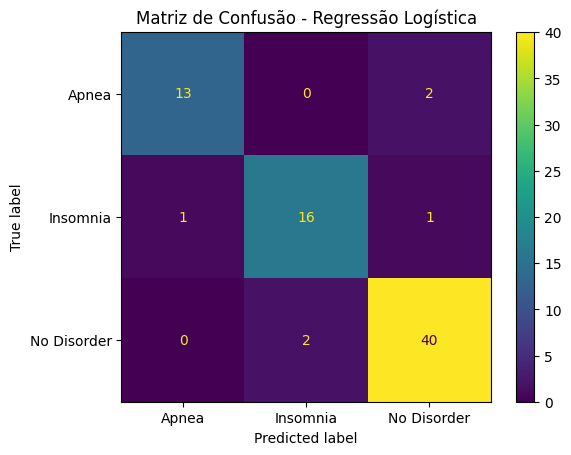

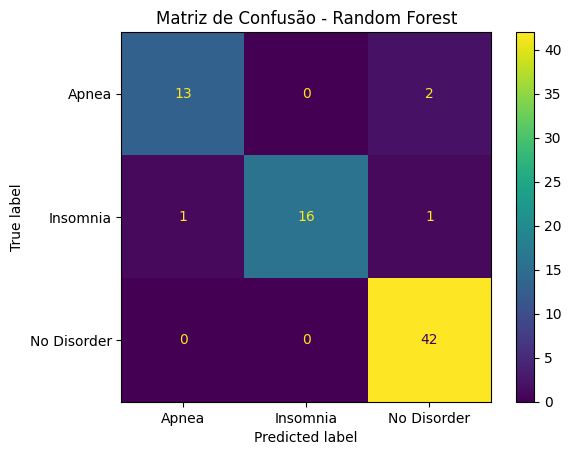

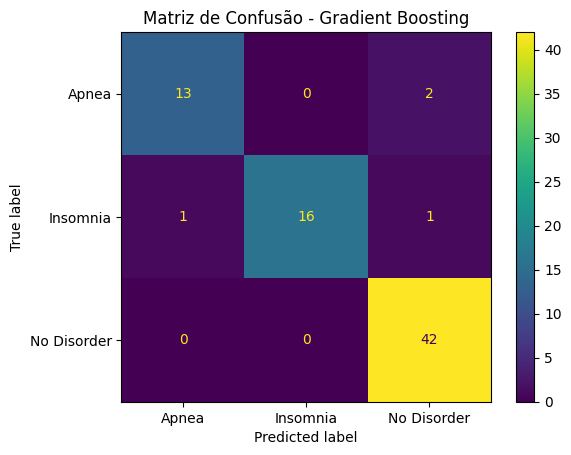

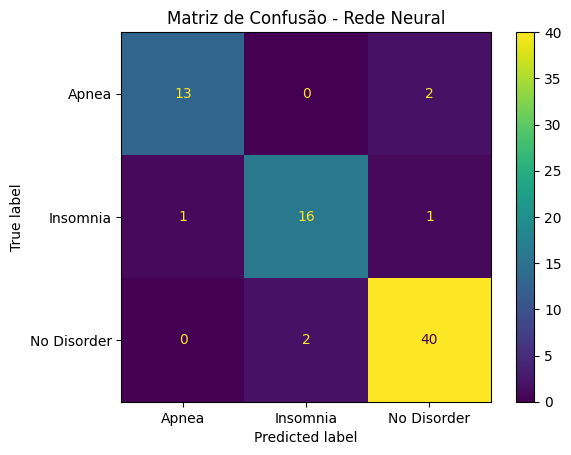

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

linearPredict = regressaoLogistica.predict(X_test_scaled)
randomForestPredict = randomForest.predict(X_test_scaled)
xgbPredict = xgb.predict(X_test_scaled)
redePredict = rede.predict(X_test_scaled)

cmlinear = confusion_matrix(y_test, linearPredict)
cmrandomForest = confusion_matrix(y_test, randomForestPredict)
cmxgb = confusion_matrix(y_test, xgbPredict)
cmrede = confusion_matrix(y_test, redePredict)

y_names = ['Apnea', 'Insomnia', 'No Disorder']

disp_linear = ConfusionMatrixDisplay(confusion_matrix=cmlinear, display_labels=y_names)
disp_randomForest = ConfusionMatrixDisplay(confusion_matrix=cmrandomForest, display_labels=y_names)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cmxgb, display_labels=y_names)
disp_rede = ConfusionMatrixDisplay(confusion_matrix=cmrede, display_labels=y_names)

disp_linear.plot()
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

disp_randomForest.plot()
plt.title("Matriz de Confusão - Random Forest")
plt.show()

disp_xgb.plot()
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

disp_rede.plot()
plt.title("Matriz de Confusão - Rede Neural")
plt.show()

#Extração de padrões Kfold 1

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


# Create a KFold object with 5 splits
#kf = KFold(n_splits=10, shuffle=True, random_state=42)
X = dataProcessada.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = dataProcessada['Sleep Disorder']

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X)

lrmodel = LogisticRegression()
lr_scores = cross_val_score(lrmodel, X_train_scaled, y, cv=10)
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Mean Score:", lr_scores.mean())

rfmodel = RandomForestClassifier()
rf_scores = cross_val_score(rfmodel, X_train_scaled, y, cv=10)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Score:", rf_scores.mean())

xgbmodel = GradientBoostingClassifier()
xgb_scores = cross_val_score(xgbmodel, X_train_scaled, y, cv=10)
print("Gradient Boosting Cross-Validation Scores:", xgb_scores)
print("Mean Score:", xgb_scores.mean())

nrmodel = MLPClassifier(hidden_layer_sizes=(11,), random_state=1, activation='relu', solver='adam', alpha=0.0001)
nr_scores = cross_val_score(nrmodel, X_train_scaled, y, cv=10)
print("Neural Network Cross-Validation Scores:", nr_scores)
print("Mean Score:", nr_scores.mean())

Logistic Regression Cross-Validation Scores: [0.68421053 0.81578947 0.92105263 0.89473684 0.97297297 1.
 1.         0.94594595 0.78378378 0.7027027 ]
Mean Score: 0.8721194879089618
Random Forest Cross-Validation Scores: [0.73684211 0.57894737 0.97368421 0.76315789 1.         0.91891892
 0.78378378 0.45945946 0.81081081 0.7027027 ]
Mean Score: 0.7728307254623045
Gradient Boosting Cross-Validation Scores: [0.73684211 0.31578947 0.97368421 0.65789474 1.         0.91891892
 0.78378378 0.62162162 0.81081081 0.7027027 ]
Mean Score: 0.7522048364153627


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

Neural Network Cross-Validation Scores: [0.65789474 0.76315789 0.92105263 0.84210526 0.97297297 1.
 1.         0.97297297 0.78378378 0.7027027 ]
Mean Score: 0.8616642958748223


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



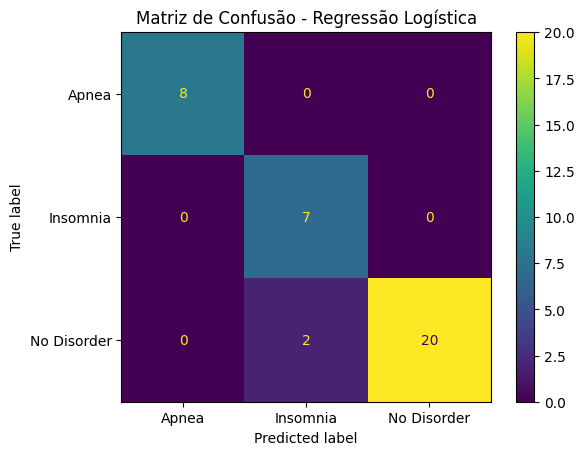

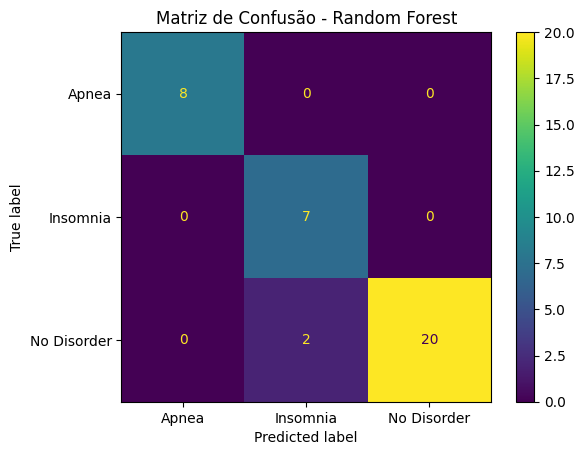

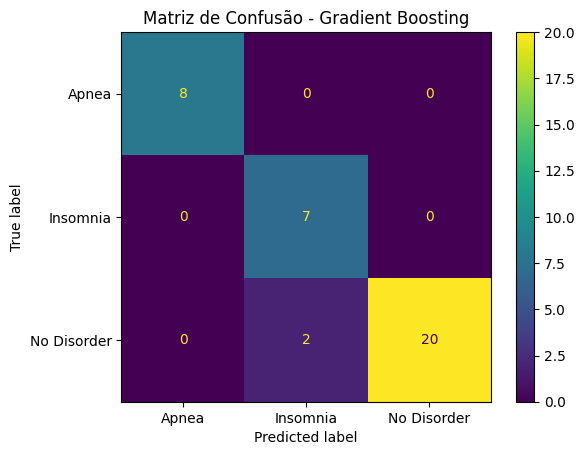

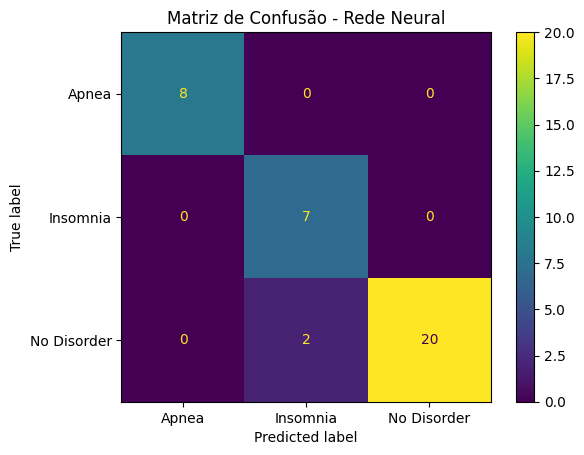

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

linearPredict = regressaoLogistica.predict(X_test_scaled)
randomForestPredict = randomForest.predict(X_test_scaled)
xgbPredict = xgb.predict(X_test_scaled)
redePredict = rede.predict(X_test_scaled)

cmlinear = confusion_matrix(y_test, linearPredict)
cmrandomForest = confusion_matrix(y_test, randomForestPredict)
cmxgb = confusion_matrix(y_test, xgbPredict)
cmrede = confusion_matrix(y_test, redePredict)

y_names = ['Apnea', 'Insomnia', 'No Disorder']

disp_linear = ConfusionMatrixDisplay(confusion_matrix=cmlinear, display_labels=y_names)
disp_randomForest = ConfusionMatrixDisplay(confusion_matrix=cmrandomForest, display_labels=y_names)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cmxgb, display_labels=y_names)
disp_rede = ConfusionMatrixDisplay(confusion_matrix=cmrede, display_labels=y_names)

disp_linear.plot()
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

disp_randomForest.plot()
plt.title("Matriz de Confusão - Random Forest")
plt.show()

disp_xgb.plot()
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

disp_rede.plot()
plt.title("Matriz de Confusão - Rede Neural")
plt.show()

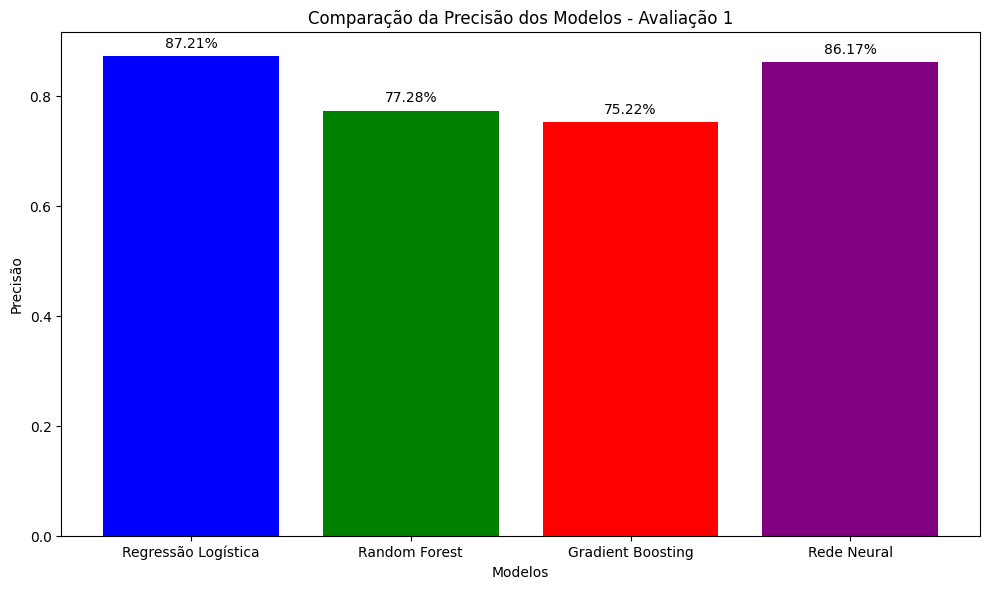

In [ ]:
# Dados para o gráfico
modelos = ['Regressão Logística', 'Random Forest', 'Gradient Boosting', 'Rede Neural']
precisoes = [lr_scores.mean(), rf_scores.mean(), xgb_scores.mean(), nr_scores.mean()]
cores = ['blue', 'green', 'red', 'purple']

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, precisoes, color=['blue', 'green', 'red', 'purple'])

# Adicione rótulos e título
plt.xlabel('Modelos')
plt.ylabel('Precisão')
plt.title('Comparação da Precisão dos Modelos - Avaliação 1')

# Adicione os valores de precisão em porcentagem acima de cada barra
for bar, precisao in zip(bars, precisoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{precisao * 100:.2f}%', ha='center', va='bottom')

# Exiba o gráfico
plt.tight_layout()
plt.show()

#Extração de padrões Kfold 2

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


# Create a KFold object with 5 splits
#kf = KFold(n_splits=10, shuffle=True, random_state=42)
X = dataProcessada2.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = dataProcessada2['Sleep Disorder']

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(X)

lrmodel = LogisticRegression()
lr_scores = cross_val_score(lrmodel, X_train_scaled, y, cv=10)
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Mean Score:", lr_scores.mean())

rfmodel = RandomForestClassifier()
rf_scores = cross_val_score(rfmodel, X_train_scaled, y, cv=10)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean Score:", rf_scores.mean())

xgbmodel = GradientBoostingClassifier()
xgb_scores = cross_val_score(xgbmodel, X_train_scaled, y, cv=10)
print("Gradient Boosting Cross-Validation Scores:", xgb_scores)
print("Mean Score:", xgb_scores.mean())

nrmodel = MLPClassifier(hidden_layer_sizes=(11,), random_state=1, activation='relu', solver='adam', alpha=0.0001)
nr_scores = cross_val_score(nrmodel, X_train_scaled, y, cv=10)
print("Neural Network Cross-Validation Scores:", nr_scores)
print("Mean Score:", nr_scores.mean())

Logistic Regression Cross-Validation Scores: [0.60526316 0.76315789 0.92105263 0.89473684 0.97297297 1.
 1.         0.59459459 0.78378378 0.86486486]
Mean Score: 0.8400426742532006
Random Forest Cross-Validation Scores: [0.68421053 0.57894737 0.97368421 0.65789474 1.         0.91891892
 0.91891892 0.62162162 0.81081081 0.86486486]
Mean Score: 0.8029871977240399
Gradient Boosting Cross-Validation Scores: [0.76315789 0.31578947 0.97368421 0.71052632 1.         0.91891892
 0.78378378 0.62162162 0.81081081 0.75675676]
Mean Score: 0.7655049786628734


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

Neural Network Cross-Validation Scores: [0.68421053 0.78947368 0.92105263 0.89473684 0.97297297 1.
 1.         0.94594595 0.75675676 0.7027027 ]
Mean Score: 0.8667852062588907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



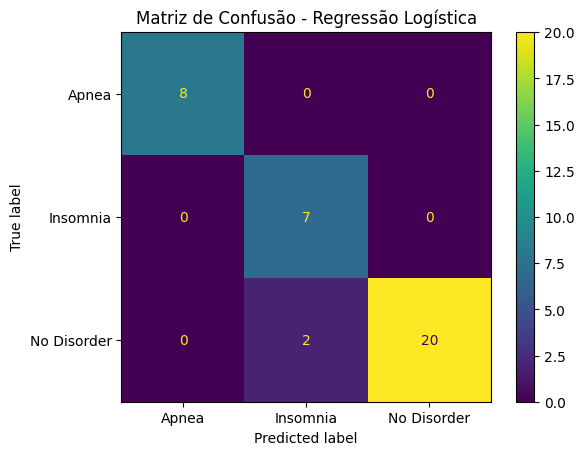

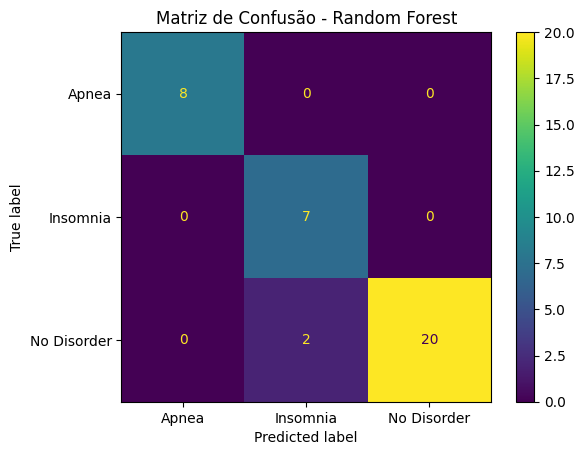

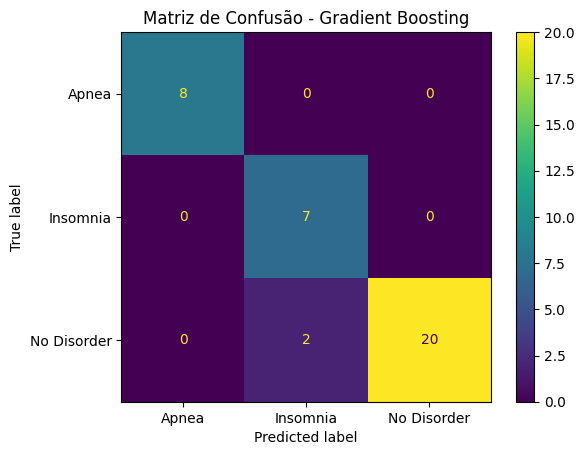

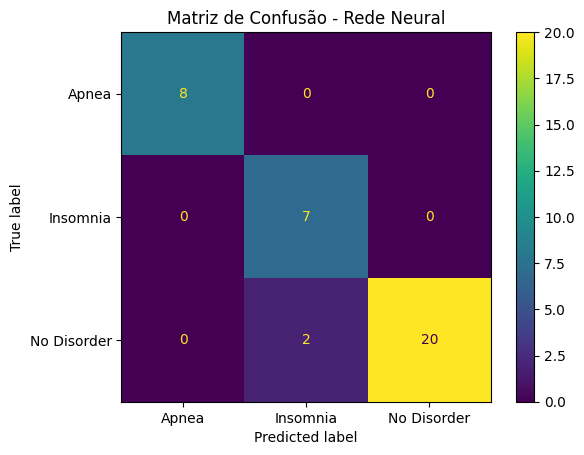

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

linearPredict = regressaoLogistica.predict(X_test_scaled)
randomForestPredict = randomForest.predict(X_test_scaled)
xgbPredict = xgb.predict(X_test_scaled)
redePredict = rede.predict(X_test_scaled)

cmlinear = confusion_matrix(y_test, linearPredict)
cmrandomForest = confusion_matrix(y_test, randomForestPredict)
cmxgb = confusion_matrix(y_test, xgbPredict)
cmrede = confusion_matrix(y_test, redePredict)

y_names = ['Apnea', 'Insomnia', 'No Disorder']

disp_linear = ConfusionMatrixDisplay(confusion_matrix=cmlinear, display_labels=y_names)
disp_randomForest = ConfusionMatrixDisplay(confusion_matrix=cmrandomForest, display_labels=y_names)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cmxgb, display_labels=y_names)
disp_rede = ConfusionMatrixDisplay(confusion_matrix=cmrede, display_labels=y_names)

disp_linear.plot()
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()

disp_randomForest.plot()
plt.title("Matriz de Confusão - Random Forest")
plt.show()

disp_xgb.plot()
plt.title("Matriz de Confusão - Gradient Boosting")
plt.show()

disp_rede.plot()
plt.title("Matriz de Confusão - Rede Neural")
plt.show()

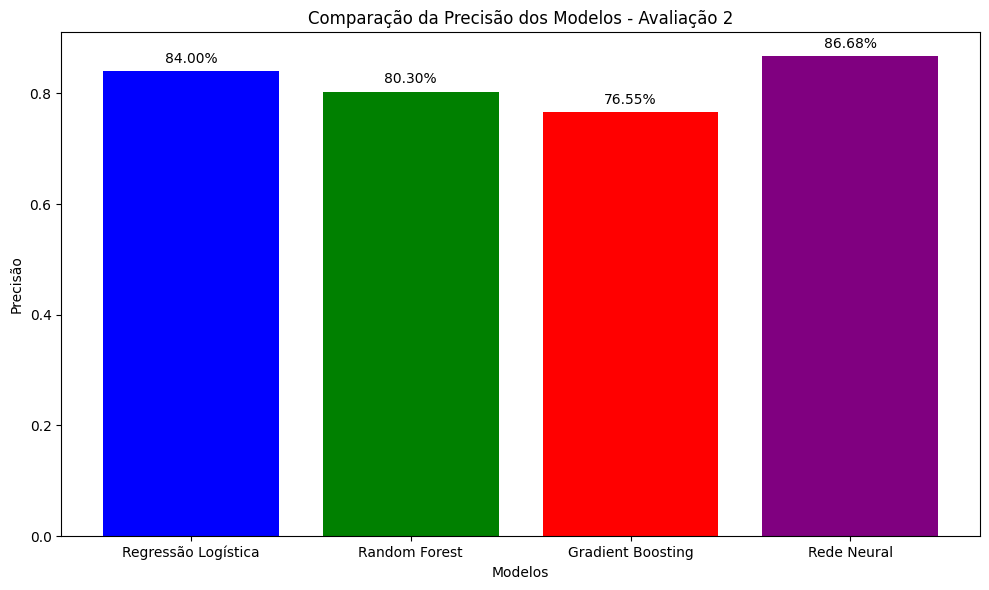

In [ ]:
import matplotlib.pyplot as plt

# Dados para o gráfico
modelos = ['Regressão Logística', 'Random Forest', 'Gradient Boosting', 'Rede Neural']
precisoes = [lr_scores.mean(), rf_scores.mean(), xgb_scores.mean(), nr_scores.mean()]
cores = ['blue', 'green', 'red', 'purple']

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, precisoes, color=['blue', 'green', 'red', 'purple'])

# Adicione rótulos e título
plt.xlabel('Modelos')
plt.ylabel('Precisão')
plt.title('Comparação da Precisão dos Modelos - Avaliação 2')

# Adicione os valores de precisão em porcentagem acima de cada barra
for bar, precisao in zip(bars, precisoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{precisao * 100:.2f}%', ha='center', va='bottom')

# Exiba o gráfico
plt.tight_layout()
plt.show()


#Keras

In [ ]:
import keras
print(keras.__version__)

3.4.1


In [ ]:
def train_and_evaluate_model(model):
    # Train the model
    model.fit(X_train_scaled, y_train, epochs=100, callbacks=callbacks)
    # Evaluate the model
    score = model.evaluate(X_test_scaled, y_test)
    print(f'Test loss: {score[0]}')
    print(f'Test accuracy: {score[1]}')

In [ ]:
X = dataProcessada.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = dataProcessada['Sleep Disorder']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(x_train)
X_test_scaled = scaler_d.transform(x_test)


callbacks = [
    keras.callbacks.EarlyStopping(monitor="loss", mode="min",patience=25),
]

# Define the Keras model
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'Sleep Disorder'
])

# Compile the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2 = keras.Sequential([
    keras.layers.Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'Sleep Disorder'
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3 = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'Sleep Disorder'
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4 = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(X_train_scaled.shape[1], 1)),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'Sleep Disorder'
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5 = keras.Sequential([
    keras.layers.GRU(64, input_shape=(X_train_scaled.shape[1], 1)),
    keras.layers.Dense(3, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_and_evaluate_model(model1)
train_and_evaluate_model(model2)
train_and_evaluate_model(model3)
train_and_evaluate_model(model4)
train_and_evaluate_model(model5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3890 - loss: 1.1543
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7469 - loss: 0.9021  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8545 - loss: 0.7637 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8735 - loss: 0.6056 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8613 - loss: 0.5274 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8896 - loss: 0.4377 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.4406  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8614 - loss: 0.4080 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8690 - loss: 0.3885 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8519 - loss: 0.4610 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8923 - loss: 0.3593 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9104 - loss: 0.4635 
Test loss: 0.49030253291130066
Test accuracy: 0.9066666960716248


In [ ]:
def train_and_evaluate_model(model, epochs, callbacks):
    # Train the model
    model.fit(X_train_scaled, y_train, epochs=epochs, callbacks=callbacks)
    # Evaluate the model
    score = model.evaluate(X_test_scaled, y_test)
    print(f'Test loss: {score[0]}')
    print(f'Test accuracy: {score[1]}')

In [ ]:
#Como os 3 primeiros modelos tiveram um melhor resultado, havera uma segunda rodada de alterações a fim de buscar melhores resultados

callbacks1 = [
    keras.callbacks.EarlyStopping(monitor="accuracy", patience=4),
]

callbacks2 = [
    keras.callbacks.EarlyStopping(monitor="accuracy", patience=5),
]

callbacks3 = [
    keras.callbacks.EarlyStopping(monitor="loss", mode="min", patience=2),
]


model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_and_evaluate_model(model1, 30, callbacks1)
train_and_evaluate_model(model2, 100, callbacks2)
train_and_evaluate_model(model3, 100, callbacks3)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9249 - loss: 0.2454
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9467 - loss: 0.1990 
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9371 - loss: 0.2181 
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9235 - loss: 0.2441 
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9254 - loss: 0.2490 
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9293 - loss: 0.2277  


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9221 - loss: 0.3599  
Test loss: 0.4202543795108795
Test accuracy: 0.9066666960716248
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8842 - loss: 0.4501  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8989 - loss: 0.4239 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8902 - loss: 0.4337 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9006 - loss: 0.4297 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8856 - loss: 0.4281 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.4332 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9510 - loss: 0.3988  
Test loss: 0.44516056776046753
Test accuracy: 0.9333333373069763
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9339 - loss: 0.2734
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9191 - loss: 0.3208 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


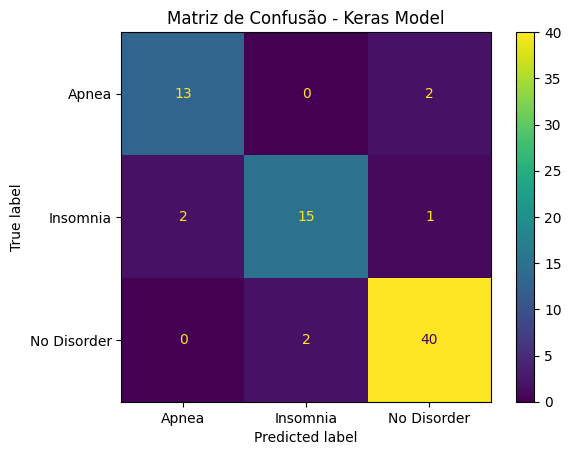

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes for the test set
y_pred = model1.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
y_names = ['Apnea', 'Insomnia', 'No Disorder']  # Replace with actual class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_names)
disp.plot()
plt.title("Matriz de Confusão - Keras Model")
plt.show()


#Keras 2

In [ ]:
import keras
print(keras.__version__)

3.4.1


In [ ]:
def train_and_evaluate_model(model):
    # Train the model
    model.fit(X_train_scaled, y_train, epochs=100, callbacks=callbacks)
    # Evaluate the model
    score = model.evaluate(X_test_scaled, y_test)
    print(f'Test loss: {score[0]}')
    print(f'Test accuracy: {score[1]}')

In [ ]:
# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are already defined

X = dataProcessada2.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = dataProcessada2['Sleep Disorder']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler_d = StandardScaler()
X_train_scaled = scaler_d.fit_transform(x_train)
X_test_scaled = scaler_d.transform(x_test)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="loss", mode="min", patience=15),
]

# Define the Keras model
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'Sleep Disorder'
])

# Compile the model
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2 = keras.Sequential([
    keras.layers.Dense(27, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'Sleep Disorder'
])

model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3 = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'Sleep Disorder'
])

model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4 = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(X_train_scaled.shape[1], 1)),
    keras.layers.Dense(3, activation='softmax')  # 3 output classes for 'Sleep Disorder'
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5 = keras.Sequential([
    keras.layers.GRU(64, input_shape=(X_train_scaled.shape[1], 1)),
    keras.layers.Dense(3, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_and_evaluate_model(model1)
train_and_evaluate_model(model2)
train_and_evaluate_model(model3)
train_and_evaluate_model(model4)
train_and_evaluate_model(model5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4685 - loss: 1.1454
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 0.8404 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8382 - loss: 0.6315 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8939 - loss: 0.5003 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.4116 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9266 - loss: 0.3616 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9171 - loss: 0.3735 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8989 - loss: 0.3729 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9264 - loss: 0.3116 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9443 - loss: 0.2592 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9159 - loss: 0.3370 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [ ]:
def train_and_evaluate_model(model, epochs, callbacks):
    # Train the model
    model.fit(X_train_scaled, y_train, epochs=epochs, callbacks=callbacks)
    # Evaluate the model
    score = model.evaluate(X_test_scaled, y_test)
    print(f'Test loss: {score[0]}')
    print(f'Test accuracy: {score[1]}')

In [ ]:
#neste segundo teste, os modelos 1, 3 e 5 obtiveram uma maior acuracia, assim indo pra uma segunda fase de ajustes
callbacks1 = [
    keras.callbacks.EarlyStopping(monitor="accuracy", patience=4),
]

callbacks2 = [
    keras.callbacks.EarlyStopping(monitor="accuracy", patience=5),
]

callbacks3 = [
    keras.callbacks.EarlyStopping(monitor="loss", mode="min", patience=2),
]


model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train_and_evaluate_model(model1, 30, callbacks1)
train_and_evaluate_model(model2, 150, callbacks2)
train_and_evaluate_model(model3, 150, callbacks3)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9477 - loss: 0.2008
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9421 - loss: 0.2165  
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9108 - loss: 0.2835 
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9227 - loss: 0.2469 
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9221 - loss: 0.2665  
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9288 - loss: 0.5090  
Test loss: 0.5493246912956238
Test accuracy: 0.9200000166893005
Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8880 - loss: 0.4051  
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8613 - loss: 0.4452 
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9078 - loss: 0.3600 
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9057 - loss: 0.4004 
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9103 - loss: 0.3754 
Epoch 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


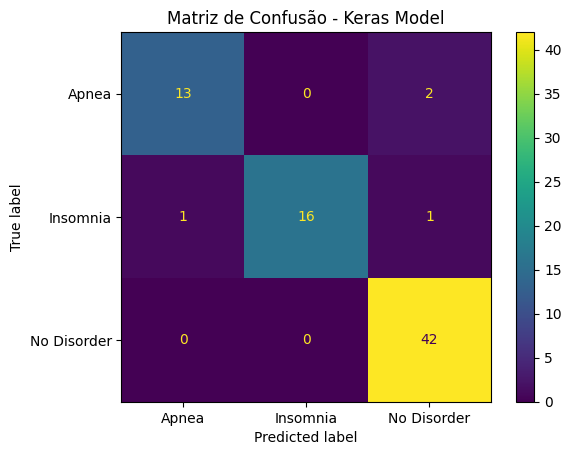

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes for the test set
y_pred = model2.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
y_names = ['Apnea', 'Insomnia', 'No Disorder']  # Replace with actual class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_names)
disp.plot()
plt.title("Matriz de Confusão - Keras Model")
plt.show()

#Keras Kfold 1

In [ ]:
import keras
print(keras.__version__)

3.4.1


In [ ]:
from sklearn.model_selection import KFold

X = dataProcessada.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = dataProcessada['Sleep Disorder']

# Define the Keras model
def create_model():
  model = keras.Sequential([
      keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
      keras.layers.Dense(32, activation='relu'),
      keras.layers.Dense(3, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  scaler_d = StandardScaler()
  X_train_scaled = scaler_d.fit_transform(X_train)
  X_test_scaled = scaler_d.transform(X_test)

  model = create_model()
  model.fit(X_train_scaled, y_train, epochs=30, verbose=0)
  score = model.evaluate(X_test_scaled, y_test, verbose=0)
  scores.append(score[1])

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
kk1=np.mean(scores)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` objec

Cross-Validation Accuracy Scores: [0.9736841917037964, 0.8157894611358643, 0.9473684430122375, 0.7894737124443054, 0.8108108043670654, 1.0, 0.9459459185600281, 0.9729729890823364, 0.8918918967247009, 0.9459459185600281]
Mean Accuracy: 0.9093883335590363


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


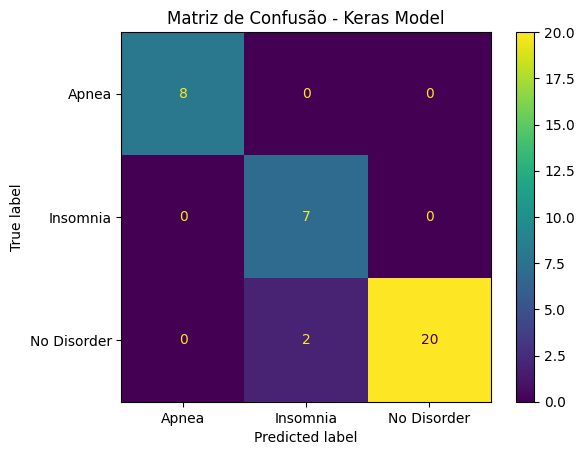

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
y_names = ['Apnea', 'Insomnia', 'No Disorder']  # Replace with actual class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_names)
disp.plot()
plt.title("Matriz de Confusão - Keras Model")
plt.show()

#Keras Kfold 2

In [ ]:
import keras
print(keras.__version__)

3.4.1


In [ ]:
from sklearn.model_selection import KFold

X = dataProcessada2.drop(['Person ID', 'Sleep Disorder'], axis=1)
y = dataProcessada2['Sleep Disorder']

# Define the Keras model
def create_model():
  model = keras.Sequential([
      keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
      keras.layers.Dense(32, activation='relu'),
      keras.layers.Dense(3, activation='softmax')
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

# K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  scaler_d = StandardScaler()
  X_train_scaled = scaler_d.fit_transform(X_train)
  X_test_scaled = scaler_d.transform(X_test)

  model = create_model()
  model.fit(X_train_scaled, y_train, epochs=30, verbose=0)
  score = model.evaluate(X_test_scaled, y_test, verbose=0)
  scores.append(score[1])

print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
kk2=np.mean(scores)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` objec

Cross-Validation Accuracy Scores: [0.9473684430122375, 0.7894737124443054, 0.9210526347160339, 0.8684210777282715, 0.8108108043670654, 0.9729729890823364, 0.9729729890823364, 0.9729729890823364, 0.837837815284729, 0.9189189076423645]
Mean Accuracy: 0.9012802362442016


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


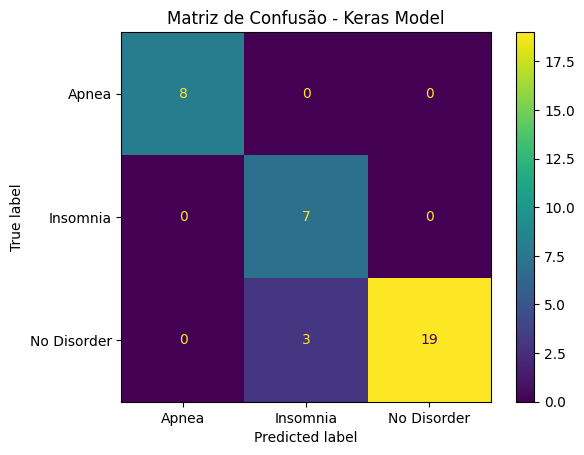

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict classes for the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix
y_names = ['Apnea', 'Insomnia', 'No Disorder']  # Replace with actual class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_names)
disp.plot()
plt.title("Matriz de Confusão - Keras Model")
plt.show()

#Gráfico comparativo dos resultados das precisões dos modelos Hold-out

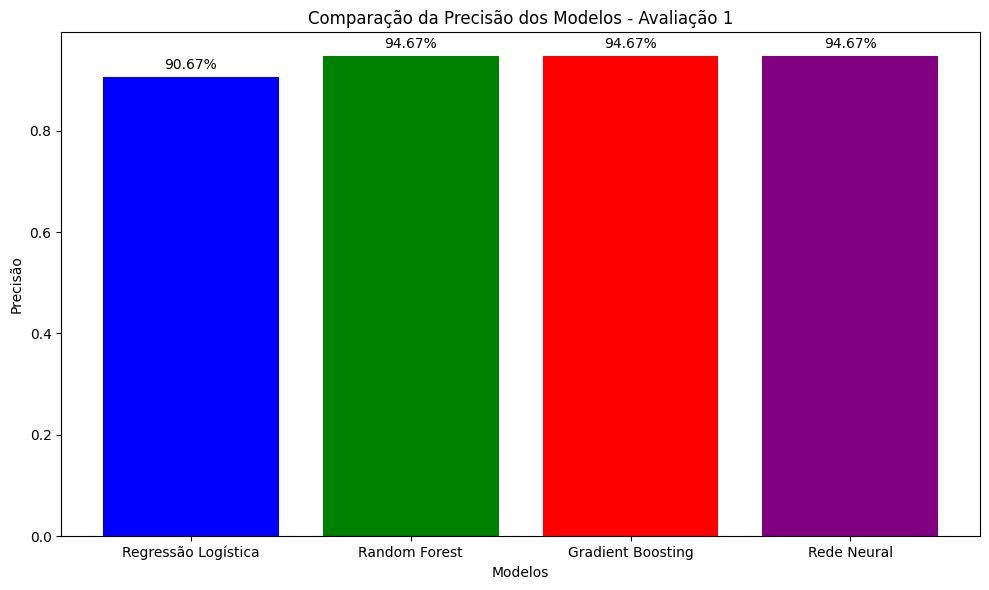

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados dos modelos (substitua com seus próprios dados)
modelos = ['Regressão Logística', 'Random Forest', 'Gradient Boosting', 'Rede Neural']
precisoes = [r1,r2,r3,r4]  # Substitua com suas precisões

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, precisoes, color=['blue', 'green', 'red', 'purple'])

# Adicione rótulos e título
plt.xlabel('Modelos')
plt.ylabel('Precisão')
plt.title('Comparação da Precisão dos Modelos - Avaliação 1')

# Adicione os valores de precisão em porcentagem acima de cada barra
for bar, precisao in zip(bars, precisoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{precisao * 100:.2f}%', ha='center', va='bottom')

# Exiba o gráfico
plt.tight_layout()
plt.show()


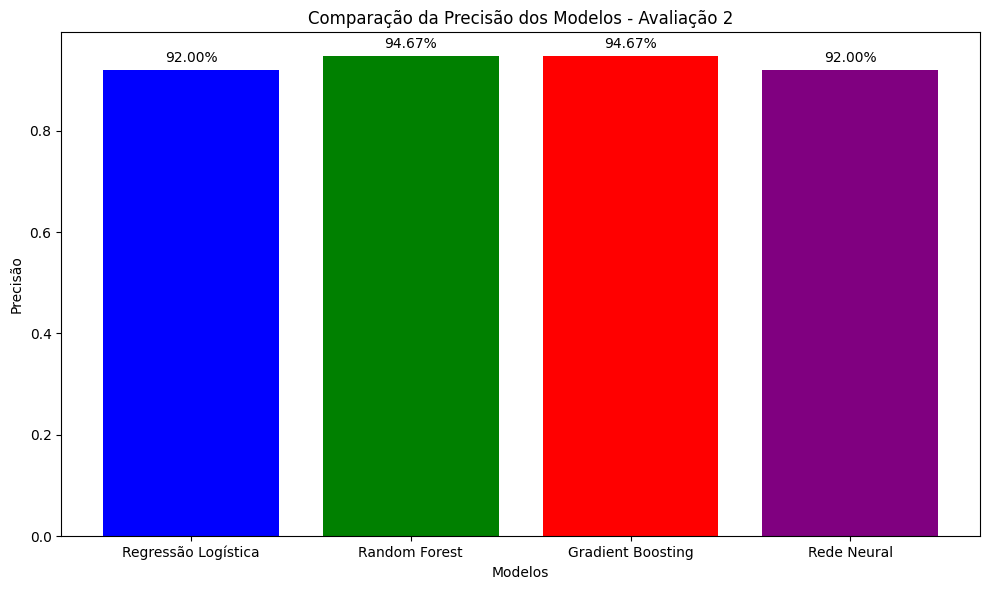

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados dos modelos (substitua com seus próprios dados)
modelos = ['Regressão Logística', 'Random Forest', 'Gradient Boosting', 'Rede Neural']
precisoes = [r5,r6,r7,r8]  # Substitua com suas precisões

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, precisoes, color=['blue', 'green', 'red', 'purple'])

# Adicione rótulos e título
plt.xlabel('Modelos')
plt.ylabel('Precisão')
plt.title('Comparação da Precisão dos Modelos - Avaliação 2')

# Adicione os valores de precisão em porcentagem acima de cada barra
for bar, precisao in zip(bars, precisoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{precisao * 100:.2f}%', ha='center', va='bottom')

# Exiba o gráfico
plt.tight_layout()
plt.show()


#Gráfico comparativo dos resultados das precisões dos modelos Keras, com k-fold

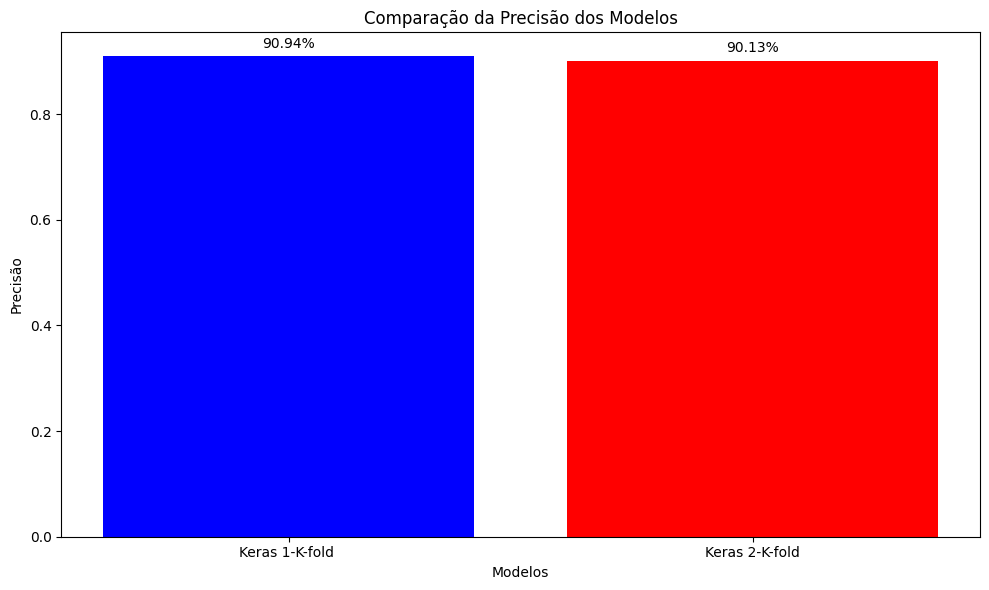

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados dos modelos (substitua com seus próprios dados)
modelos = ['Keras 1-K-fold ', 'Keras 2-K-fold']
precisoes = [kk1,kk2]  # Substitua com suas precisões

# Crie o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(modelos, precisoes, color=['blue', 'red'])

# Adicione rótulos e título
plt.xlabel('Modelos')
plt.ylabel('Precisão')
plt.title('Comparação da Precisão dos Modelos')

# Adicione os valores de precisão em porcentagem acima de cada barra
for bar, precisao in zip(bars, precisoes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{precisao * 100:.2f}%', ha='center', va='bottom')

# Exiba o gráfico
plt.tight_layout()
plt.show()


# Keras, gráficos comparativos sem k-fold

Model 1 - Test loss: 0.2603181004524231
Model 1 - Test accuracy: 0.9459459185600281
Model 2 - Test loss: 0.30606645345687866
Model 2 - Test accuracy: 0.9189189076423645
Model 3 - Test loss: 0.24015560746192932
Model 3 - Test accuracy: 0.9459459185600281
Model 4 - Test loss: 0.32335805892944336
Model 4 - Test accuracy: 0.8918918967247009
Model 5 - Test loss: 0.34514689445495605
Model 5 - Test accuracy: 0.9189189076423645


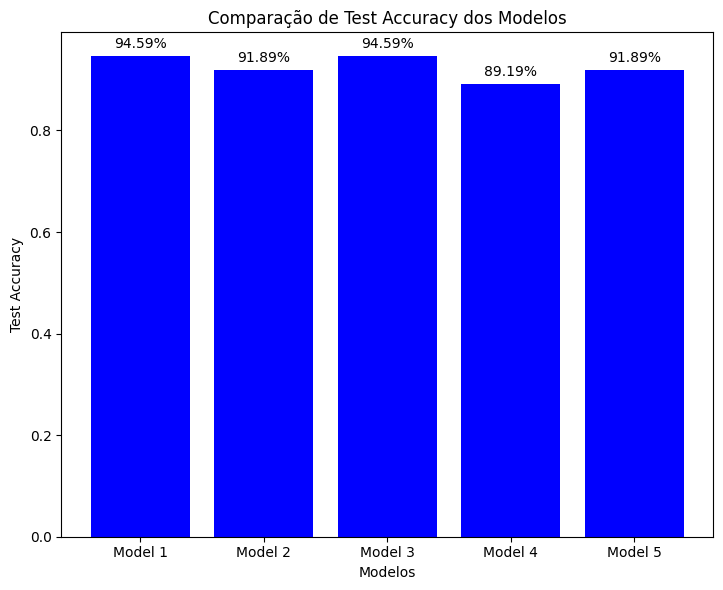

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para treinar e avaliar o modelo, retornando as métricas
def train_and_evaluate_model(model, model_name):
    # Treina o modelo
    model.fit(X_train_scaled, y_train, epochs=100, callbacks=callbacks, verbose=0)
    # Avalia o modelo
    score = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'{model_name} - Test loss: {score[0]}')
    print(f'{model_name} - Test accuracy: {score[1]}')
    return score[0], score[1]

# Definindo os modelos e seus nomes
models = {
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3,
    'Model 4': model4,
    'Model 5': model5
}

# Listas para armazenar as perdas e acurácias
test_losses = []
test_accuracies = []

# Treina e avalia cada modelo, armazenando os resultados
for model_name, model in models.items():
    loss, accuracy = train_and_evaluate_model(model, model_name)
    test_losses.append(loss)
    test_accuracies.append(accuracy)

# Cria um gráfico comparativo
plt.figure(figsize=(14, 6))

# Gráfico de Test Loss
#plt.subplot(1, 2, 1)
#bars1 = plt.bar(models.keys(), test_losses, color='orange')
#plt.xlabel('Modelos')
#plt.ylabel('Test Loss')
#plt.title('Comparação de Test Loss dos Modelos')
#for bar, loss in zip(bars1, test_losses):
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{loss:.4f}', ha='center', va='bottom')

# Gráfico de Test Accuracy
plt.subplot(1, 2, 2)
bars2 = plt.bar(models.keys(), test_accuracies, color='blue')
plt.xlabel('Modelos')
plt.ylabel('Test Accuracy')
plt.title('Comparação de Test Accuracy dos Modelos')
for bar, accuracy in zip(bars2, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy * 100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Model 1 - Test loss: 0.24188371002674103
Model 1 - Test accuracy: 0.9459459185600281
Model 2 - Test loss: 0.3083430826663971
Model 2 - Test accuracy: 0.9189189076423645
Model 3 - Test loss: 0.2342052012681961
Model 3 - Test accuracy: 0.9459459185600281


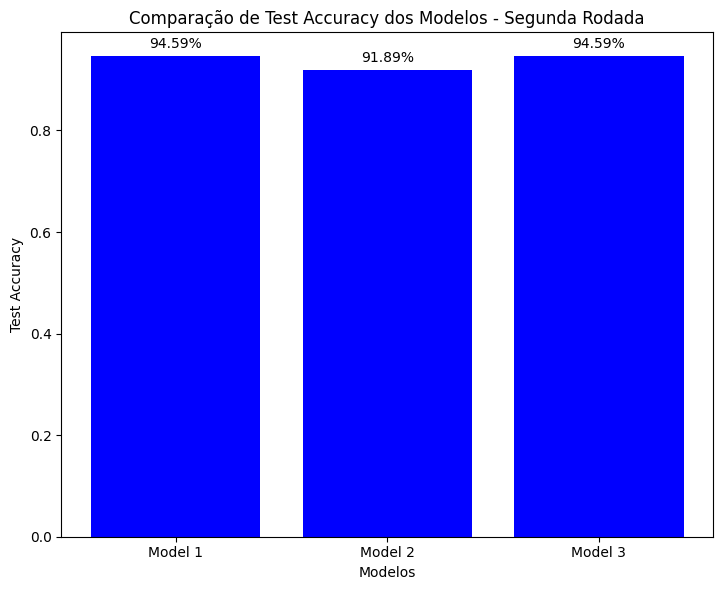

In [ ]:
#TOP 3 melhores

import matplotlib.pyplot as plt
import numpy as np

# Função para treinar e avaliar o modelo, com argumentos adicionais para epochs e callbacks
def train_and_evaluate_model(model, epochs, callbacks, model_name):
    # Treina o modelo
    model.fit(X_train_scaled, y_train, epochs=epochs, callbacks=callbacks, verbose=0)
    # Avalia o modelo
    score = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'{model_name} - Test loss: {score[0]}')
    print(f'{model_name} - Test accuracy: {score[1]}')
    return score[0], score[1]

# Definindo os novos callbacks
callbacks1 = [
    keras.callbacks.EarlyStopping(monitor="accuracy", patience=4),
]

callbacks2 = [
    keras.callbacks.EarlyStopping(monitor="accuracy", patience=5),
]

callbacks3 = [
    keras.callbacks.EarlyStopping(monitor="loss", mode="min", patience=2),
]

# Compilando os modelos com novos otimizadores
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Listas para armazenar as perdas e acurácias
test_losses = []
test_accuracies = []

# Treina e avalia cada modelo, armazenando os resultados
models = {
    'Model 1': (model1, 30, callbacks1),
    'Model 2': (model2, 100, callbacks2),
    'Model 3': (model3, 100, callbacks3)
}

for model_name, (model, epochs, callbacks) in models.items():
    loss, accuracy = train_and_evaluate_model(model, epochs, callbacks, model_name)
    test_losses.append(loss)
    test_accuracies.append(accuracy)

# Cria um gráfico comparativo
plt.figure(figsize=(14, 6))

# Gráfico de Test Loss
# plt.subplot(1, 2, 1)
# bars1 = plt.bar(models.keys(), test_losses, color='orange')
# plt.xlabel('Modelos')
# plt.ylabel('Test Loss')
# plt.title('Comparação de Test Loss dos Modelos - Segunda Rodada')
# for bar, loss in zip(bars1, test_losses):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{loss:.4f}', ha='center', va='bottom')

# Gráfico de Test Accuracy
plt.subplot(1, 2, 2)
bars2 = plt.bar(models.keys(), test_accuracies, color='blue')
plt.xlabel('Modelos')
plt.ylabel('Test Accuracy')
plt.title('Comparação de Test Accuracy dos Modelos - Segunda Rodada')
for bar, accuracy in zip(bars2, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy * 100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Keras 2, gráficos comparativos sem k-fold

Model 1 - Test loss: 0.2467217892408371
Model 1 - Test accuracy: 0.9459459185600281
Model 2 - Test loss: 0.30772536993026733
Model 2 - Test accuracy: 0.9189189076423645
Model 3 - Test loss: 0.2343384027481079
Model 3 - Test accuracy: 0.9459459185600281
Model 4 - Test loss: 0.35003209114074707
Model 4 - Test accuracy: 0.9189189076423645
Model 5 - Test loss: 0.46423637866973877
Model 5 - Test accuracy: 0.8108108043670654


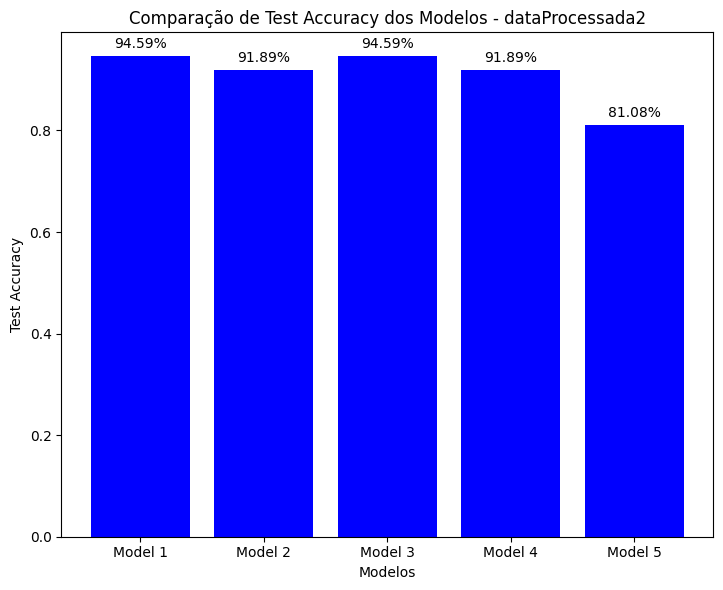

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Função para treinar e avaliar o modelo, retornando as métricas
def train_and_evaluate_model(model, model_name):
    # Treina o modelo
    model.fit(X_train_scaled, y_train, epochs=100, callbacks=callbacks, verbose=0)
    # Avalia o modelo
    score = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'{model_name} - Test loss: {score[0]}')
    print(f'{model_name} - Test accuracy: {score[1]}')
    return score[0], score[1]

# Definindo os modelos e seus nomes
models = {
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3,
    'Model 4': model4,
    'Model 5': model5
}

# Listas para armazenar as perdas e acurácias
test_losses = []
test_accuracies = []

# Treina e avalia cada modelo, armazenando os resultados
for model_name, model in models.items():
    loss, accuracy = train_and_evaluate_model(model, model_name)
    test_losses.append(loss)
    test_accuracies.append(accuracy)

# Cria um gráfico comparativo
plt.figure(figsize=(14, 6))

# Gráfico de Test Loss
# plt.subplot(1, 2, 1)
# bars1 = plt.bar(models.keys(), test_losses, color='orange')
# plt.xlabel('Modelos')
# plt.ylabel('Test Loss')
# plt.title('Comparação de Test Loss dos Modelos - dataProcessada2')
# for bar, loss in zip(bars1, test_losses):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{loss:.4f}', ha='center', va='bottom')

# Gráfico de Test Accuracy
plt.subplot(1, 2, 2)
bars2 = plt.bar(models.keys(), test_accuracies, color='blue')
plt.xlabel('Modelos')
plt.ylabel('Test Accuracy')
plt.title('Comparação de Test Accuracy dos Modelos - dataProcessada')
for bar, accuracy in zip(bars2, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy * 100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Model 1 - Test loss: 0.2481907457113266
Model 1 - Test accuracy: 0.9459459185600281
Model 3 - Test loss: 0.23996548354625702
Model 3 - Test accuracy: 0.9459459185600281
Model 5 - Test loss: 0.36677101254463196
Model 5 - Test accuracy: 0.8918918967247009


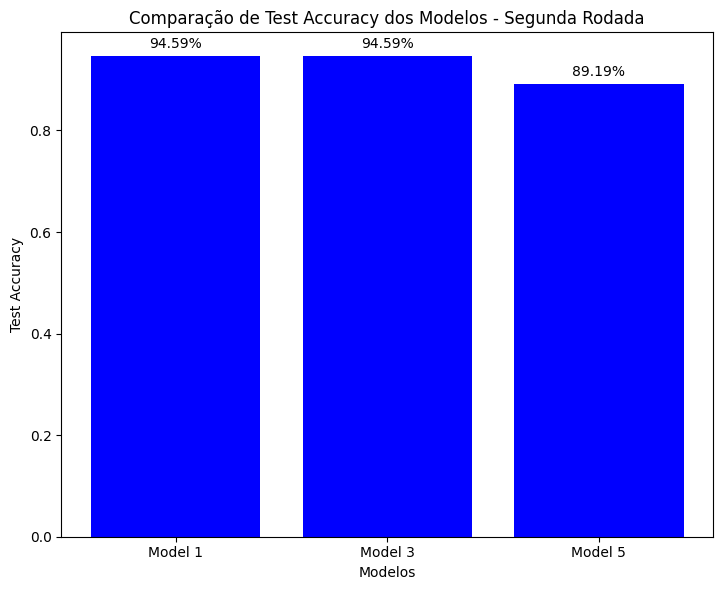

In [ ]:
#TOP 3

import matplotlib.pyplot as plt
import numpy as np

# Função para treinar e avaliar o modelo, retornando as métricas
def train_and_evaluate_model(model, epochs, callbacks, model_name):
    # Treina o modelo
    model.fit(X_train_scaled, y_train, epochs=epochs, callbacks=callbacks, verbose=0)
    # Avalia o modelo
    score = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f'{model_name} - Test loss: {score[0]}')
    print(f'{model_name} - Test accuracy: {score[1]}')
    return score[0], score[1]

# Definindo os novos callbacks
callbacks1 = [
    keras.callbacks.EarlyStopping(monitor="accuracy", patience=4),
]

callbacks2 = [
    keras.callbacks.EarlyStopping(monitor="accuracy", patience=5),
]

callbacks3 = [
    keras.callbacks.EarlyStopping(monitor="loss", mode="min", patience=2),
]

# Compilando os modelos com os ajustes necessários
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model3.compile(optimizer='adadelta',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Listas para armazenar as perdas e acurácias
test_losses = []
test_accuracies = []

# Dicionário para armazenar os modelos, epochs e callbacks
models = {
    'Model 1': (model1, 30, callbacks1),
    'Model 3': (model3, 150, callbacks3),
    'Model 5': (model5, 150, callbacks2)
}

# Treina e avalia cada modelo, armazenando os resultados
for model_name, (model, epochs, callbacks) in models.items():
    loss, accuracy = train_and_evaluate_model(model, epochs, callbacks, model_name)
    test_losses.append(loss)
    test_accuracies.append(accuracy)

# Cria um gráfico comparativo
plt.figure(figsize=(14, 6))

# Gráfico de Test Loss
# plt.subplot(1, 2, 1)
# bars1 = plt.bar(models.keys(), test_losses, color='orange')
# plt.xlabel('Modelos')
# plt.ylabel('Test Loss')
# plt.title('Comparação de Test Loss dos Modelos - Segunda Rodada')
# for bar, loss in zip(bars1, test_losses):
#     plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{loss:.4f}', ha='center', va='bottom')

# Gráfico de Test Accuracy
plt.subplot(1, 2, 2)
bars2 = plt.bar(models.keys(), test_accuracies, color='blue')
plt.xlabel('Modelos')
plt.ylabel('Test Accuracy')
plt.title('Comparação de Test Accuracy dos Modelos - Segunda Rodada')
for bar, accuracy in zip(bars2, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy * 100:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

